experimenting with pretrained model

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
from keras.applications import ResNet50



# Paths to training and testing data
training_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Training'
testing_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Testing'

# Image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Assuming you have two classes
)

# # Print the class names
# class_names = list(train_generator.class_indices.keys())
# print("Class Names:", class_names)

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained ResNet-50 model with weights from ImageNet
base_model = ResNet50(
    include_top=False, #don't want to include the top layer because we will define our own input/output layer
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    # pooling=None,
    pooling= 'max',
    classes=2,
)
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# base_model.trainable = False
    
# Add custom classification layers on top of ResNet-50
# these new layers and specifically the 512 neurons are the ones that will be learning the new weights 
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  # Assuming 2 classes: Healthy and Hearing Impaired


# Create the final model
model = keras.Model(base_model.input, x)

# Print model summary
model.summary()

# # Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# # Evaluate the model on the testing data
# test_loss, test_acc = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc}")


Found 1440 images belonging to 2 classes.


Found 320 images belonging to 2 classes.
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                   

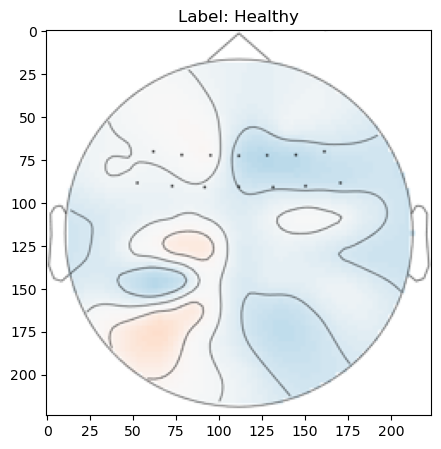

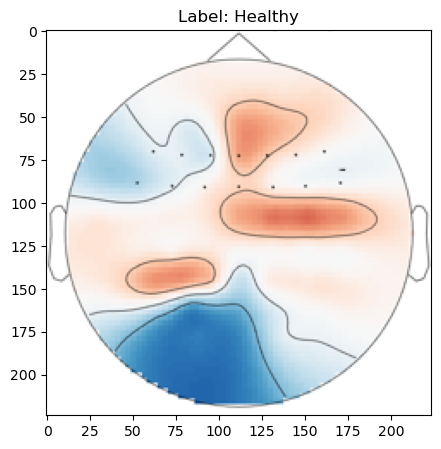

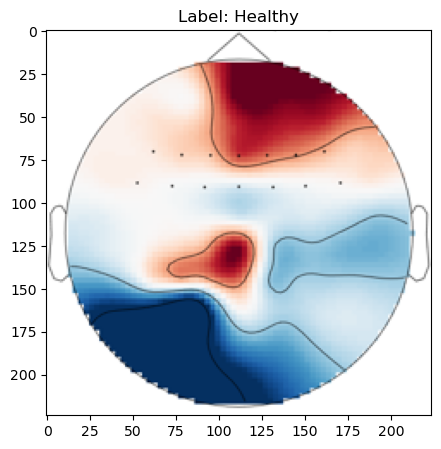

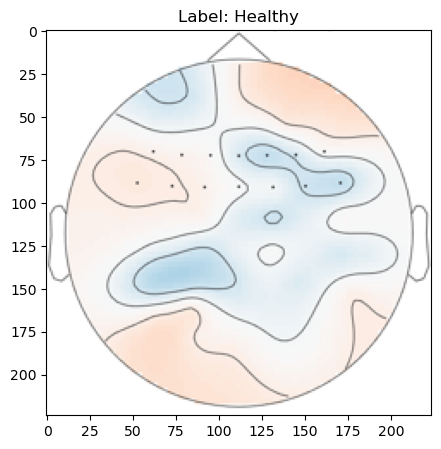

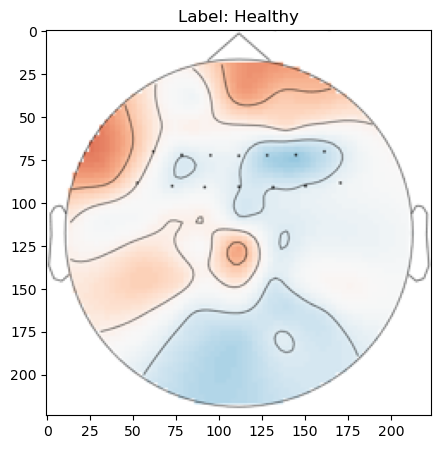

In [12]:
import os
from PIL import Image
import numpy as np

def extract_label_from_path(file_path):
    # Assuming your folder structure has folders named "Healthy" and "Hearing Impaired"
    if "Healthy" in file_path:
        return "Healthy"
    elif "Hearing Impaired" in file_path:
        return "Hearing Impaired"
    else:
        return None  # You may need to handle other cases depending on your dataset

def load_images_from_folder(folder_path):
    images = []
    labels = []

    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            if file_path.endswith(".png"):
                # print("success")
                # Load the image using PIL
                img = Image.open(file_path)
                # Convert the image to a NumPy array if needed
                img_array = np.array(img)
                # Extract the label from the file path
                label = extract_label_from_path(file_path)
                if label is not None:
                    # Append the image and its label to the lists
                    images.append(img_array)
                    labels.append(label)

    return images, labels

# Load training data
training_images, training_labels = load_images_from_folder(training_data_path)


# Load testing data
testing_images, testing_labels = load_images_from_folder(testing_data_path)

# Display the first few images
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.figure(figsize=(5, 5))
    plt.imshow(training_images[i])
    plt.title(f"Label: {training_labels[i]}")
    plt.show()


In [ ]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size = 10)